# 1. Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# 2. Loading the Dataset

In [2]:
df = pd.read_csv(r"data\laptrack.csv")
df.head()

,Laptop_Brand,Laptop_Name,Processor_Company,Operating_System,Processor,Number_of_Reviews,Price,Storage_Type,Storage,Rating,Screen_Size,RAM,Source
0,ZHAOHUIXIN,PC1068,Alwinner,Android,1.8 GHz a13,1,119.99,EMMC,64,4.5,10.1,2,Amazon
1,TPV,AceBook,Intel,Windows 11 Pro,Core i5,13,309.99,SSD,512,4.5,15.6,16,Amazon
2,HP,Elitebook,Intel,Windows 11 Pro,Intel Core i7,5,1079,SSD,2048,4,16.0,32,Amazon
3,Apple,MacBook Air,Apple,Mac OS,Apple M3,0,929,SSD,256,4,13.6,8,Amazon
4,Apple,MacBook Air,Apple,Mac OS,Apple M3,0,1449,SSD,512,4,15.3,16,Amazon


# 3. Exploratory Data Analysis

## 3.1 Exploring the Meta Data information

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4838 entries, 0 to 4837
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Laptop_Brand       4838 non-null   object 
 1   Laptop_Name        4838 non-null   object 
 2   Processor_Company  4838 non-null   object 
 3   Operating_System   4838 non-null   object 
 4   Processor          4838 non-null   object 
 5   Number_of_Reviews  4838 non-null   int64  
 6   Price              4838 non-null   object 
 7   Storage_Type       4838 non-null   object 
 8   Storage            4838 non-null   object 
 9   Rating             4836 non-null   object 
 10  Screen_Size        4838 non-null   float64
 11  RAM                4838 non-null   int64  
 12  Source             4838 non-null   object 
dtypes: float64(1), int64(2), object(10)
memory usage: 491.5+ KB


### Observation
- There are only 2 null values in rating, which will be handled later.
- The data type for the column: `Rating`, `Storage`, `Price` are in object which needs to be changed to numbers(or appropriate datatype).

In [4]:
# Strip leading and trailing spaces from each category in 'Processor_Company'
df['Processor_Company'] = df['Processor_Company'].str.strip()

# Display the updated DataFrame to verify
print(df['Processor_Company'].unique())

['Alwinner' 'Intel' 'Apple' 'AMD' 'MediaTek' 'ARM' 'Qualcomm' 'Chromebook'
 'Snapdragon' 'AMD Ryzen' 'No Info' 'AMD\xa0Ryzen']


In [5]:
# Replace 'AMD\xa0Ryzen' with 'AMD Ryzen'
df['Processor_Company'] = df['Processor_Company'].str.replace('\xa0', ' ', regex=False)

# Display the updated DataFrame to verify the changes
print(df['Processor_Company'].unique())

['Alwinner' 'Intel' 'Apple' 'AMD' 'MediaTek' 'ARM' 'Qualcomm' 'Chromebook'
 'Snapdragon' 'AMD Ryzen' 'No Info']


In [6]:
# Looking at the unique values in Rating Storage and Price to see if there are any wrong values
cols = ["Rating","Storage","Price"]

for feature in cols:
    print("Unique values in",feature,":",df[feature].unique())
    print()

Unique values in Rating : ['4.5' '4' '4.3' '4.4' '4.6' '4.1' '4.2' '3.8' '3.4' '1' '5' '3' '3.9'
 '4.7' '3.5' '2.6' '3.7' '3.3' '3.6' '4.8' nan '0' '4.9' '0 Reviews' '2'
 '2.7' '3.2' '2.5' '2.2' '2.8' '2.4' '1.7' '2.9' '2.3' '1.5']

Unique values in Storage : ['64' '512' '2048' '256' '128' '8192' '4096' '1000' '32' '16' '4' '640'
 '250' '500' '192' '320' '2' '1048576' '16384' '576' '1024' '64eMMC'
 '128eMMC' '128GeMMC' '128UFS' '512PCIe' '256UFS' '32eMMC' '750']

Unique values in Price : ['119.99' '309.99' '1079' ... '3149.99' '589.99' '4149.99']



In [7]:
# Handling above values by extracting numbers
df['Storage'] = df['Storage'].str.extract('(\d+)', expand=False)

df['Rating'] = df['Rating'].str.replace(' Reviews', '', regex=False)
df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')

df['Price'] = pd.to_numeric(df['Price'], errors='coerce')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4838 entries, 0 to 4837
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Laptop_Brand       4838 non-null   object 
 1   Laptop_Name        4838 non-null   object 
 2   Processor_Company  4838 non-null   object 
 3   Operating_System   4838 non-null   object 
 4   Processor          4838 non-null   object 
 5   Number_of_Reviews  4838 non-null   int64  
 6   Price              4817 non-null   float64
 7   Storage_Type       4838 non-null   object 
 8   Storage            4838 non-null   object 
 9   Rating             4836 non-null   float64
 10  Screen_Size        4838 non-null   float64
 11  RAM                4838 non-null   int64  
 12  Source             4838 non-null   object 
dtypes: float64(3), int64(2), object(8)
memory usage: 491.5+ KB


### Observation
- All the columns are now in correct data format.
- Since the number of null values are very small the data will be dropped.

In [9]:
# Dropping Null values
df.dropna(inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4815 entries, 0 to 4837
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Laptop_Brand       4815 non-null   object 
 1   Laptop_Name        4815 non-null   object 
 2   Processor_Company  4815 non-null   object 
 3   Operating_System   4815 non-null   object 
 4   Processor          4815 non-null   object 
 5   Number_of_Reviews  4815 non-null   int64  
 6   Price              4815 non-null   float64
 7   Storage_Type       4815 non-null   object 
 8   Storage            4815 non-null   object 
 9   Rating             4815 non-null   float64
 10  Screen_Size        4815 non-null   float64
 11  RAM                4815 non-null   int64  
 12  Source             4815 non-null   object 
dtypes: float64(3), int64(2), object(8)
memory usage: 526.6+ KB


In [10]:
# Percent of data loss
loss_per = (4838 - 4815)/4838
loss_per*=100
print("The total data loss (in %) is:",loss_per)

The total data loss (in %) is: 0.475403059115337


- Now with the data all cleaned and ready lets proceed for analyzing the data

#### NOTE - FOR THIS PROJECT THE CURRENT EDA IS DONE AS PER PROJECT GUIDELINE BASIS ONLY

## Analysis Statement
- What is the relationship between RAM size and laptop prices?
- Does this relationship hold consistent across different brands and platforms (Amazon, Flipkart, BestBuy)?

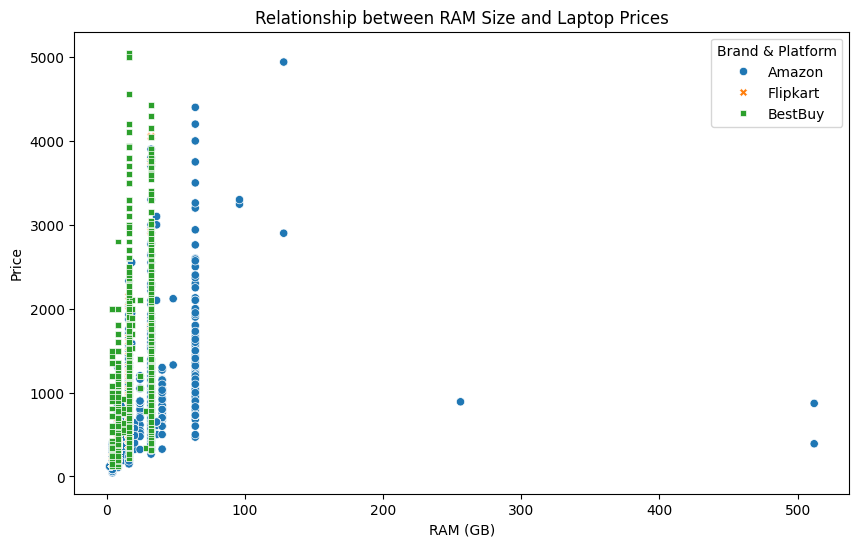

In [11]:
# Visualizing the data on scatter plot to identify relationship
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='RAM', y='Price',hue="Source", style='Source')
plt.title('Relationship between RAM Size and Laptop Prices')
plt.xlabel('RAM (GB)')
plt.ylabel('Price')
plt.legend(title='Brand & Platform')
plt.show()

### Observation
- The above plot shows that for a given RAM size, the price of laptop can vary greatly, i.e. the variance is high.
- There are some laptops which are acting as outliers where the for RAM 250GB the price is 1000 USD, and belong to Amazon.
- The outliers are not very significant and can be dealt with later during model building if it causes an issue.
- The variance observation is consistent across the sources as evident in above plot.
- For better clarity for the mentioned point, lets plot few more visualizations.

<Figure size 1000x600 with 0 Axes>

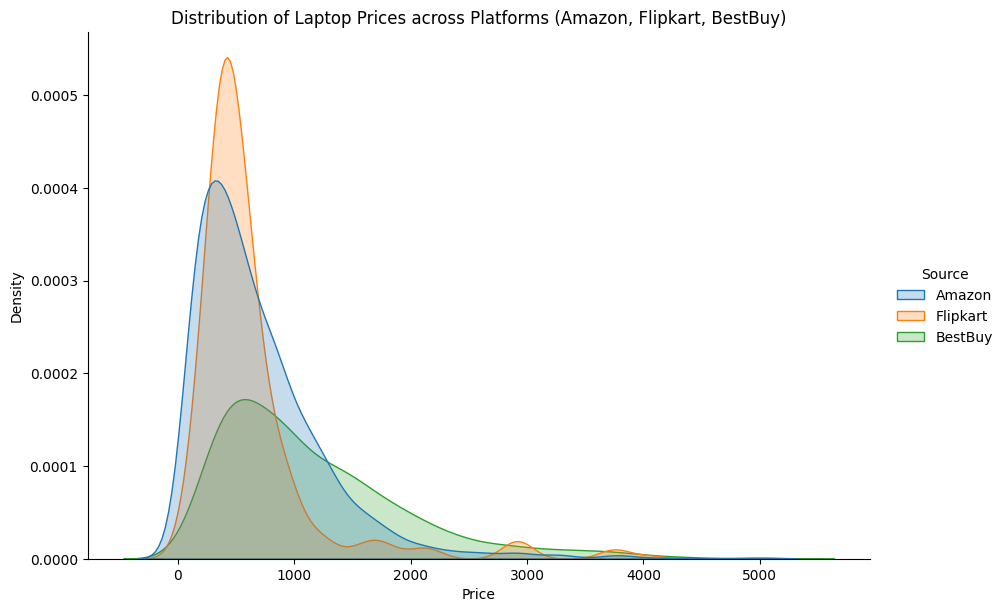

In [12]:
# Distribution of Price across Platforms
plt.figure(figsize=(10, 6))
sns.displot(data=df, x='Price', hue='Source', kind='kde', fill=True, height=6, aspect=1.5)

plt.title('Distribution of Laptop Prices across Platforms (Amazon, Flipkart, BestBuy)')
plt.xlabel('Price')
plt.ylabel('Density')

plt.show()

<Figure size 500x600 with 0 Axes>

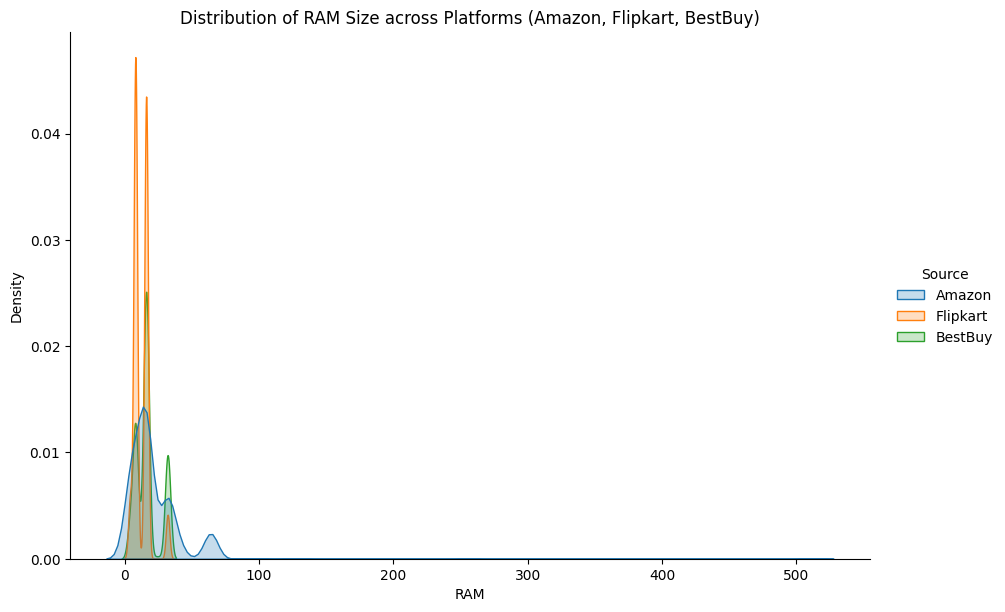

In [13]:
# Distribution of RAM across Platforms
plt.figure(figsize=(5, 6))
sns.displot(data=df, x='RAM', hue='Source', kind='kde', fill=True, height=6, aspect=1.5)

plt.title('Distribution of RAM Size across Platforms (Amazon, Flipkart, BestBuy)')
plt.xlabel('RAM')
plt.ylabel('Density')

plt.show()

### Observation
- The above distribution are consistent with our observatrions made above.

## Analysis Statement
- Which processor company (Intel, AMD, etc.) dominates the market across different price ranges?

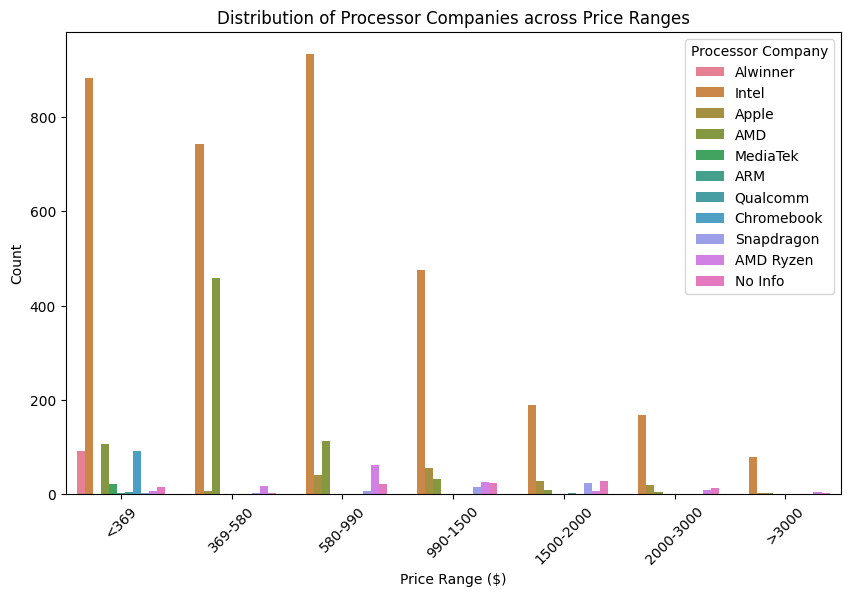

In [14]:
# Define price ranges (you can adjust the bins based on your data)
bins = [0, 370, 580, 990, 1500, 2000, 3000, df['Price'].max()]
labels = ['<369', '369-580', '580-990', '990-1500', '1500-2000', '2000-3000', '>3000']

# Create a new column for price ranges
df['Price_Range'] = pd.cut(df['Price'], bins=bins, labels=labels)

# Plot the distribution of processor companies across price ranges
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Price_Range', hue='Processor_Company')
plt.title('Distribution of Processor Companies across Price Ranges')
plt.xlabel('Price Range ($)')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Processor Company')
plt.show()

### Observation
- The above plot tells that acroos different price ranges, the market is dominated by `Intel` followed by `Apple`.
- Even though `Apple` is know for being a market player for costly machines, the number of `Intel` products in that price bracket is way more than `Apple`.
- There are other processor companies as well which are present in different price brackets but are not having enough number of products to compete against the market dominators, `Intel` and `Apple`.
- An interesting point is that `ARM based processor` companies like, `mediatek`, `snapdragon`, `qualcomm`, ettc. are all entering the market with low end laptops and Apple seems to be absent in lower price bracket of `369 USD`. 

# References
1. 